<a href="https://colab.research.google.com/github/Deividasbu/Podcast-reviews-analysis-using-SQL/blob/main/podcasts_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this Part




Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyse the Podcast Reviews Dataset.
You will have to apply all that you have learned about Statistical Inference & SQL to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of statistical testing and exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Podcast Reviews Dataset](https://www.kaggle.com/thoughtvector/podcastreviews).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- Explain how to perform a permutation procedure
- What is the difference between a parameter and a statistic?
- What is a confidence interval?
- Why is it risky to assume a normal distribution?
- Why do we need to have control groups, while doing A/B testing?

#### Preparing the workplace

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from wordcloud import WordCloud, STOPWORDS
import statsmodels
from scipy import stats
from scipy.stats import levene
import numpy as np, statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Connencting to the data

In [2]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

con = sqlite3.connect("database.sqlite")

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


Defining necessary plotting functions

In [ ]:
def bar_plot(x, y, df, title:str):

  plt.figure(figsize=(12, 6))
  
  splot = sns.barplot(x=x, y=y, data=df, palette='Blues')
  splot.bar_label(splot.containers[0])
  sns.set(style="whitegrid")
  plt.xlabel('')
  plt.ylabel('')
  plt.title(title, size=18, color='#4f4e4e', pad=14)
  plt.xticks(size=12, color='#4f4e4e', rotation=40, ha='right')
  plt.yticks([], [])
  sns.despine(left=True)


def prepare_and_plot_wordcloud(values):

  comment_words = ''
  stopwords = set(STOPWORDS.union(['podcast', 'podcasts']))
  for review in values:
      tokens = review.split()  
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                        collocations=False,
                        background_color ='white',
                        stopwords = stopwords,
                        min_font_size = 10).generate(comment_words)
  
  plt.figure(figsize = (12, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()


#### Inspecting the tables

In [ ]:
pd.read_sql("""SELECT * FROM sqlite_master WHERE TYPE = 'table' """, con)

,type,name,tbl_name,rootpage,sql
0,table,runs,runs,2,CREATE TABLE runs (\n run_at text not n...
1,table,podcasts,podcasts,3,CREATE TABLE podcasts (\n podcast_id te...
2,table,categories,categories,5,CREATE TABLE categories (\n podcast_id ...
3,table,reviews,reviews,7,CREATE TABLE reviews (\n podcast_id tex...


In [ ]:
pd.read_sql("select * from podcasts limit 5", con)

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000aa69852b276565c4f5eb9cdd999b,1342447811,speedway-soccer,https://podcasts.apple.com/us/podcast/speedway...,Speedway Soccer


In [ ]:
pd.read_sql("select * from reviews limit 5", con)

,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00


## Basic Exploratory Data Analysis


Checking distinct podcasts' categories 

In [ ]:
pd.read_sql("select distinct(category) from categories ", con)

,category
0,arts
1,arts-performing-arts
2,music
3,arts-design
4,education
5,society-culture
6,arts-visual-arts
7,technology
8,arts-food
9,society-culture-personal-journals


We can see that there are 26 distinc categories. However most of them are similiar. There are many categories of different religions, different type of arts, business.  
Therefore below categories are narrowed down by combining similiar ones ito one.

In [ ]:
query = """
select distinct(category_updated)
from(
  select *, 
   (case
      when category like "%art%" then 'Arts'
      when category like "%business%" then 'Business'
      when category like "%culture%" then 'Culture'
      when category = "buddhism" then 'Religion'
      when category = "hinduism" then 'Religion'
      when category = "islam" then 'Religion'
      when category = "christianity" then 'Religion'
      when category = "judaism" then 'Religion'
      when category = "religion-spirituality" then 'Religion'
      else upper(substr(category, 1, 1)) || substr(category, 2)
   end) AS category_updated
  from categories
)
"""

pd.read_sql(query, con)

,category_updated
0,Arts
1,Music
2,Education
3,Culture
4,Technology
5,Comedy
6,Tv-film
7,Kids-family
8,Religion
9,Business


Now there exist only 11 different categories, each representing a different field.

We can now check the average ratings of podcasts in each category. The plot below swhows excactly that.

In [ ]:
query = """
        select c.category_updated, round(avg(rating),2) rating, count(*) num_reviews
        from reviews 
        join (select *,
              (case
                  when category like "%art%" then 'Arts'
                  when category like "%business%" then 'Business'
                  when category like "%culture%" then 'Culture'
                  when category = "buddhism" then 'Religion'
                  when category = "hinduism" then 'Religion'
                  when category = "islam" then 'Religion'
                  when category = "christianity" then 'Religion'
                  when category = "judaism" then 'Religion'
                  when category = "religion-spirituality" then 'Religion'
                  else upper(substr(category, 1, 1)) || substr(category, 2)
              end) as category_updated
            FROM categories) c
        using (podcast_id)
        group by category_updated
        order by rating desc
        """
top_categories_avg_r = pd.read_sql(query, con)
top_categories_avg_r

,category_updated,rating,num_reviews
0,Spirituality,4.84,26228
1,Business,4.82,202821
2,Religion,4.80,156673
3,Education,4.79,119906
4,Music,4.78,42617
5,Kids-family,4.75,66933
6,Arts,4.74,153775
7,Comedy,4.63,256910
8,Culture,4.59,380668
9,Technology,4.54,35576


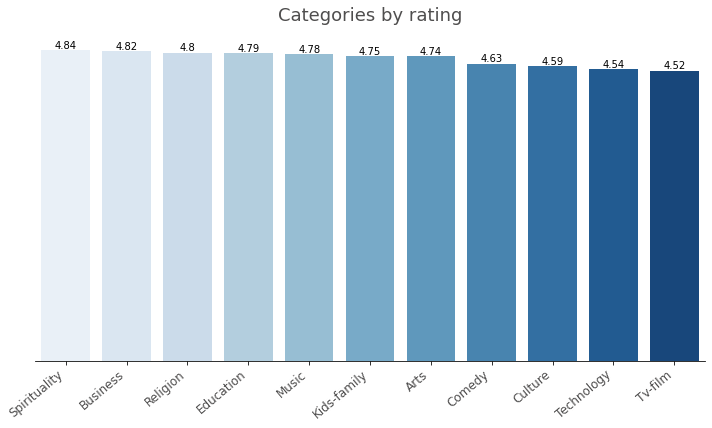

In [ ]:
bar_plot(x='category_updated', y='rating', df=top_categories_avg_r, title='Categories by rating')

We can see that podcasts of categories Spirituality and Businesss are rated the highest, while podcasts about Tv/Films and Technologies are rated the lowest. 

We can also check the number of podcasts in each category. Below the query gives us these results ant they are plotted in the bar chart.

In [ ]:
query = """
SELECT category_updated, count(*) as count 
from podcasts
join (select *,
      (CASE
          when category like "%art%" then 'Arts'
          when category like "%business%" then 'Business'
          when category like "%culture%" then 'Culture'
          when category = "buddhism" then 'Religion'
          when category = "hinduism" then 'Religion'
          when category = "islam" then 'Religion'
          when category = "christianity" then 'Religion'
          when category = "judaism" then 'Religion'
          when category = "religion-spirituality" then 'Religion'
          else upper(substr(category, 1, 1)) || substr(category, 2)
      END) AS category_updated
    FROM categories) 
using (podcast_id)
group by 1
order by 2 desc
"""

podcasts = pd.read_sql(query, con)
podcasts

,category_updated,count
0,Culture,13337
1,Religion,12963
2,Arts,8566
3,Business,8321
4,Comedy,8080
5,Education,5334
6,Tv-film,5130
7,Music,4123
8,Technology,2328
9,Kids-family,1657


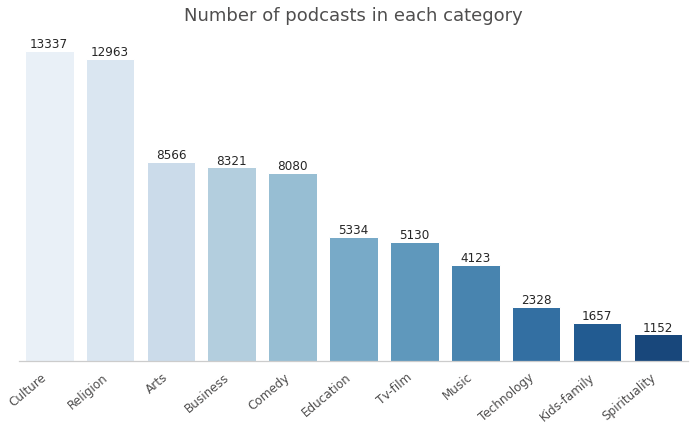

In [ ]:
bar_plot(x='category_updated', y='count', df=podcasts, title='Number of podcasts in each category')

The most popular categories of the podcasts are Culture and Religion, which is quite strange for me because I have never noticed many podcasts about religion.

We can also check which podcasts have the highest number of reviews

In [ ]:
query = """select p.title, count(*) num_reviews, avg(rating) average_rating
          from podcasts p
          join reviews r
          using (podcast_id)
          group by 1
          order by 2 desc
          limit 10
        """
most_reviews = pd.read_sql(query, con)
most_reviews

,title,num_reviews,average_rating
0,My Favorite Murder with Karen Kilgariff and Ge...,9173,3.665213
1,Wow in the World,7742,4.801343
2,True Crime Obsessed,6170,4.288331
3,Story Pirates,5758,4.764328
4,Know Your Aura with Mystic Michaela,4339,4.987555
5,Armchair Expert with Dax Shepard,4328,4.145102
6,Crime in Sports,4316,4.934893
7,Bachelor Happy Hour with Rachel & Ali – The Of...,4157,3.669233
8,The Joe Rogan Experience,4090,3.737408
9,Wine & Crime,4001,4.754811


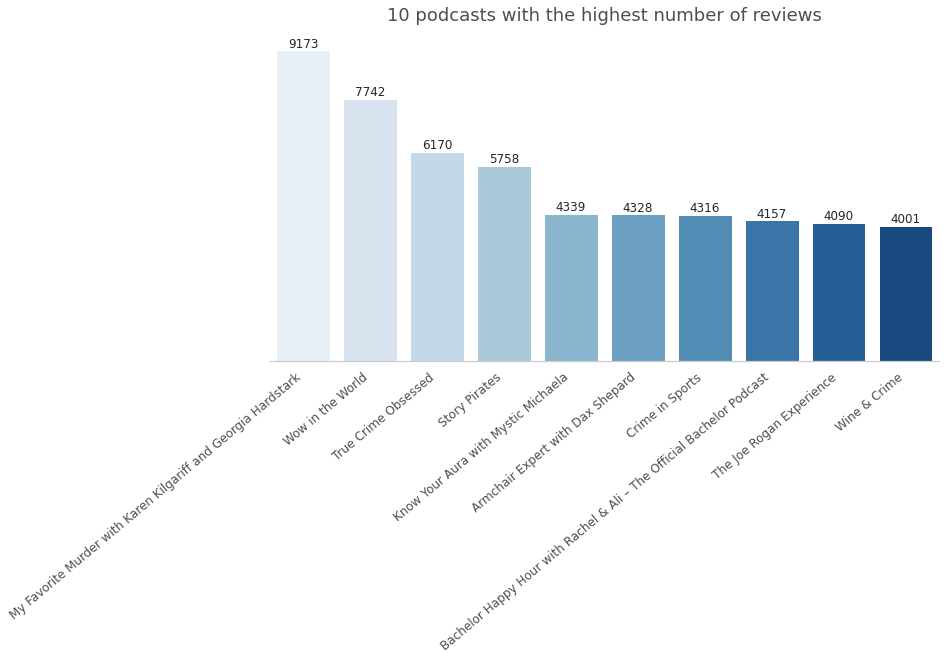

In [ ]:
bar_plot(x='title', y='num_reviews', df=most_reviews, title='10 podcasts with the highest number of reviews')

It seems that "My Favourite Murder with Karen Kilgariff and Georgia Hardstark" is the most reviewd podcsat having more than twice reviews compared to podcasts in the 5th place. Its rating, however, is not that high - only 3.67, as it can be seen above the plot.

However, these results looks suspisciuos once glimsed at the apple podcasts page. It shows that "My Favourite Murder with Karen Kilgariff and Georgia Hardstark" has over 150k (9k here) of reviews and the average rating of 4.6 (compared to 3.7 here). 

![](https://drive.google.com/uc?export=view&id=1qfF795tNqL4wJzCNrRnJN9l37gwHf9fg)

Nevertheless, lets continue analysis and find the podcasts with the highest rating. In order not to get the podcasts with a rating of 5 and a really low number of reviews, I filter the podcasts to have the number of reviews > 1000.

In [ ]:
query = """select p.title, round(avg(rating), 2) rating, count(*) num_reviews
          from reviews r
          join podcasts p
          using (podcast_id)
          group by p.title
          having num_reviews > 1000
          order by rating desc
          limit 10
        """
top_categories2 = pd.read_sql(query, con)
top_categories2

,title,rating,num_reviews
0,Know Your Aura with Mystic Michaela,4.99,4339
1,Sassy Lashes,4.99,1145
2,K-Pop Daebak w/ Eric Nam,4.98,2704
3,Ali on the Run Show,4.96,1034
4,Andrea Savage: A Grown-Up Woman #buttholes,4.96,1317
5,Cleared Hot,4.95,1267
6,Fantastic Geeks (and where to find them),4.95,1499
7,Manifestation Babe,4.95,1473
8,The Anthropocene Reviewed,4.94,1047
9,The Weekly Planet,4.94,1599


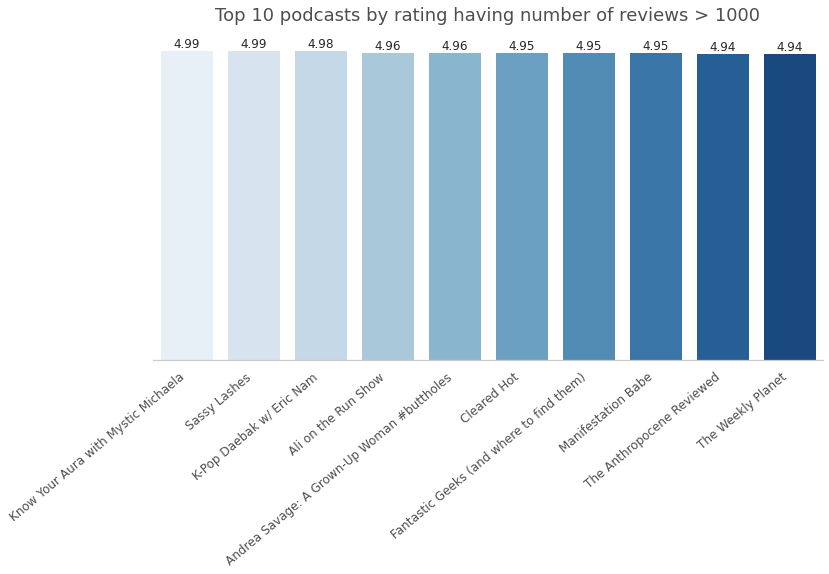

In [ ]:
bar_plot(x='title', y='rating', df=top_categories2, title='Top 10 podcasts by rating having number of reviews > 1000')

"Know Your Aura with Mystic Michaela" seems to be the best rated podcast.  
This time the results looks similiar to the ones provided by Apple. 
![](https://drive.google.com/uc?export=view&id=1qoA8AutxD_QCNbMI9liRtCNSQXRC0b8u)

Respectively, lets see which podcasts to avoid by finding the worst rated ones.

In [ ]:
query = """select p.title, p.podcast_id, avg(rating) rating, count(*) num_reviews
          from reviews 
          join podcasts p
          using(podcast_id)
          group by p.title
          having num_reviews > 1000
          order by rating 
          limit 10
        """
worst_podcasts = pd.read_sql(query, con)
worst_podcasts

,title,podcast_id,rating,num_reviews
0,The Ben and Ashley I Almost Famous Podcast,ce295a06b5c7d06a1d123cdc66fb70c7,2.764773,1743
1,Cold Case Files,c787e85061615f1896b5f51acd0fbb56,2.999004,1004
2,Off The Vine with Kaitlyn Bristowe,d739564fca425b41c8c785d82ec64c18,3.227568,1850
3,Real Crime Profile,eff99a5849e0b2ad6a888fa21ee35d25,3.412425,1159
4,Straight Up with Stassi,b7b4bdc0af05e557dc772b52be8cd986,3.470018,1134
5,Radiolab,e054ccd66e08e18eb58fb0a9a6f341d9,3.488491,1173
6,Something Was Wrong,ae44a724e94dcec1616d6e695e6198ba,3.509036,1992
7,The Dave Ramsey Show,d1c2ee274bcf6188e5b6202fb1273452,3.512879,1747
8,Reply All,b36bc2d74d2223534570d3fbfa714466,3.569908,2067
9,Unsolved Murders: True Crime Stories,a584c91f3e438a69b63d1939fe1b7919,3.609734,1089


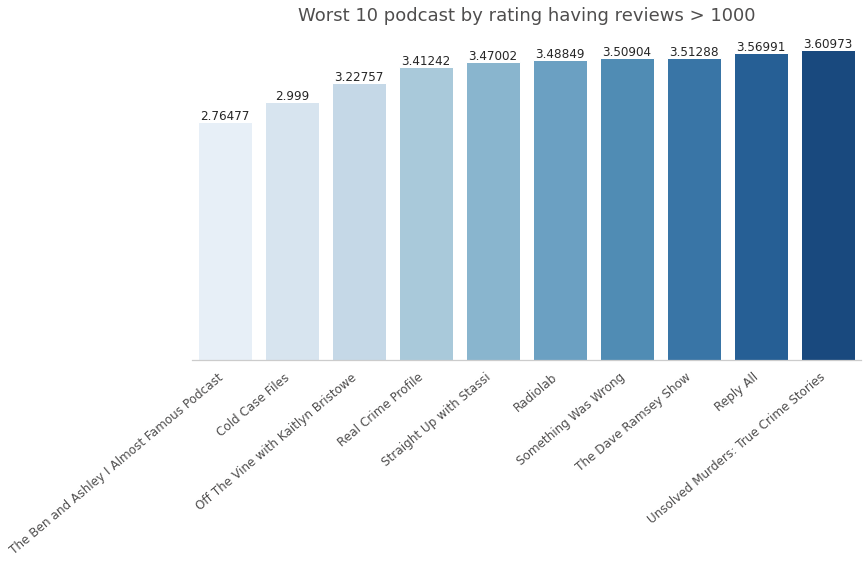

In [ ]:
bar_plot(x='title', y='rating', df=worst_podcasts, title='Worst 10 podcast by rating having reviews > 1000')

"The Ben and Ashley I Almost Famous" seems to be the worst rated podcast.   
The results again do not match the ones in Apple Podcasts. Reviews - 1.7k here vs 13.2k at Apple, Rating - 2.76 vs 3.9.
![](https://drive.google.com/uc?export=view&id=1MCdTeiAdgJEkbu-GirkPQ5_Vp7OxOeQm)  

Given reviews table has time at which review was written, we can see the pattern of the number of reviews written and their average rating over time. 

In [ ]:
query = """
        select strftime('%Y-%m', r.created_at) as Month, count(*) num_reviews, avg(r.rating) average_rating
        from reviews r
        where Month != 'None'
        group by 1
        """
num_reviews = pd.read_sql(query, con)
num_reviews

,Month,num_reviews,average_rating
0,2005-12,202,4.826733
1,2006-01,319,4.708464
2,2006-02,323,4.764706
3,2006-03,281,4.640569
4,2006-04,254,4.610236
...,...,...,...
186,2021-06,12803,4.379286
187,2021-07,11791,4.323297
188,2021-08,11109,4.309209
189,2021-09,12554,4.448781


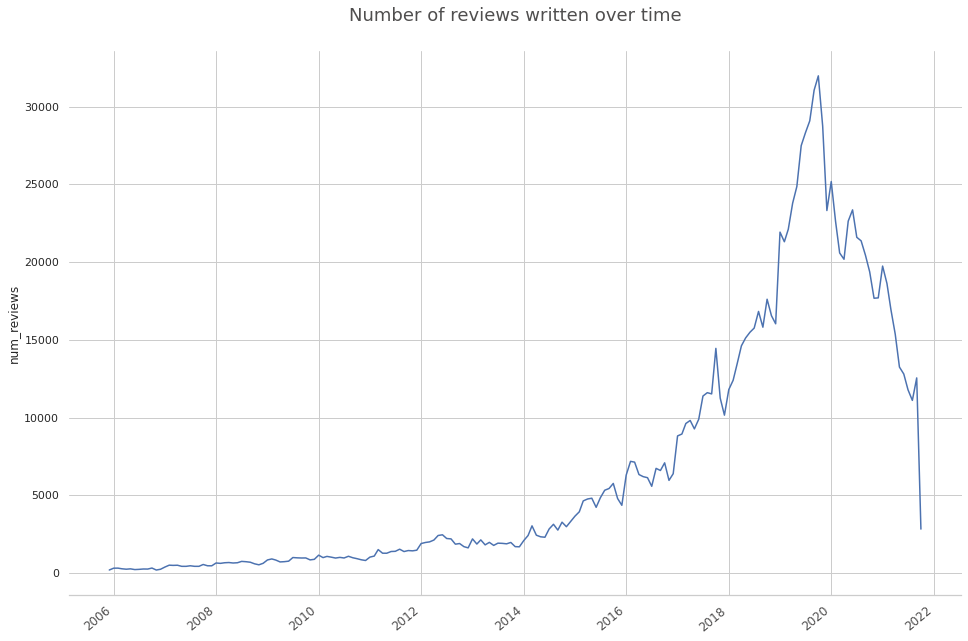

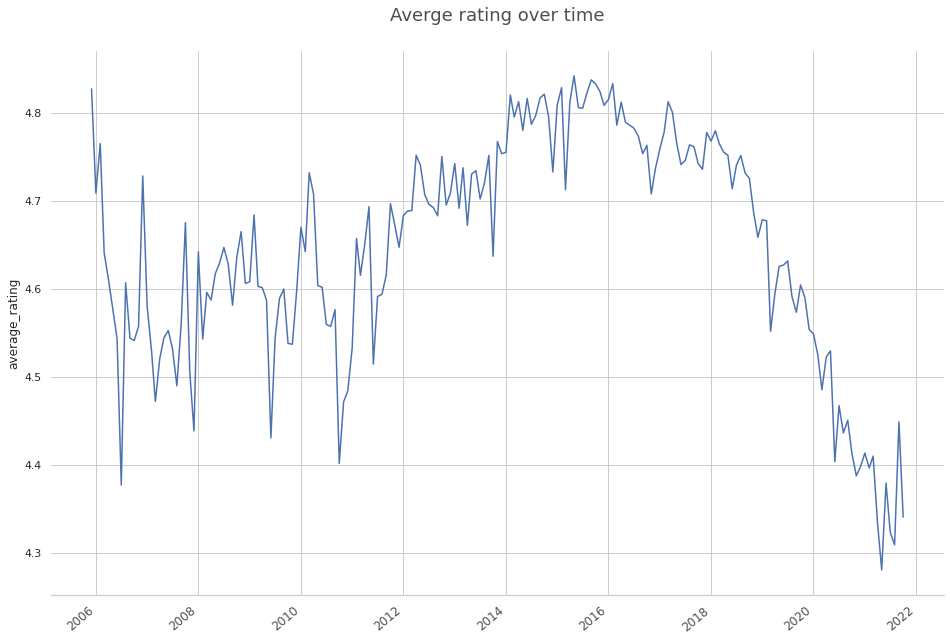

In [ ]:
c = ['Number of reviews written over time', 'Averge rating over time']
columns = ['num_reviews', 'average_rating']
for value in columns:
  num_reviews['Month'] = pd.to_datetime(num_reviews['Month'])
  plt.figure(figsize=(16, 10))
  sns.lineplot(x='Month', y=value, data=num_reviews)
  
  sns.set(style="whitegrid")
  plt.title(c[columns.index(value)], size=18, 
            color='#4f4e4e', pad=30)
  plt.xlabel('')
  plt.ylabel(value)
  plt.xticks(size=12, color='#4f4e4e', rotation=40, ha='right')
  sns.despine(left=True)


It is visible that number of reviews kept increasing over time achieving all time high in 2019. Then it started to decrease dramatically.   
In a minute I found a few articles saying that [2019 was podcasting's breakout year](https://techcrunch.com/2020/01/02/2019-was-podcastings-breakout-year/) and naming 2019 as [The year of the podcast](https://www.prca.org.uk/2019-PRedictions-The-year-of-the-podcast).   
However, what's interesting is that as the number of reviews written started to increase fastly in 2016 (probably because of the higher supply and increasing popularity of the podcasts), the average rating started to decrease. This can suggest that with more podcasts available online, people became more whimsical and this led to worse ratings overall. 


We can also check whether the difference between the number of reviews written over different weekdays exists.

In [ ]:
query = """
        select count(*) num_reviews, round(avg(rating), 2) avg_rating,
        case cast (strftime('%w', created_at) as integer)
                  when 0 then 'Sunday'
                  when 1 then 'Monday'
                  when 2 then 'Tuesday'
                  when 3 then 'Wednesday'
                  when 4 then 'Thursday'
                  when 5 then 'Friday'
                  else 'Saturday' end as day_of_week
        from reviews
        where day_of_week != 'None'
        group by day_of_week
        order by 
            case
                when day_of_week = 'Monday' then 1
                when day_of_week = 'Tuesday' then 2
                when day_of_week = 'Wednesday' then 3
                when day_of_week = 'Thursday' then 4
                when day_of_week = 'Friday' then 5
                when day_of_week = 'Saturday' then 6
                when day_of_week = 'Sunday' then 7
            end asc
        """
num_reviews_week = pd.read_sql(query, con)
num_reviews_week

,num_reviews,avg_rating,day_of_week
0,175479,4.60,Monday
1,208643,4.61,Tuesday
2,218251,4.63,Wednesday
3,212787,4.62,Thursday
4,199825,4.63,Friday
5,140255,4.62,Saturday
6,125097,4.59,Sunday


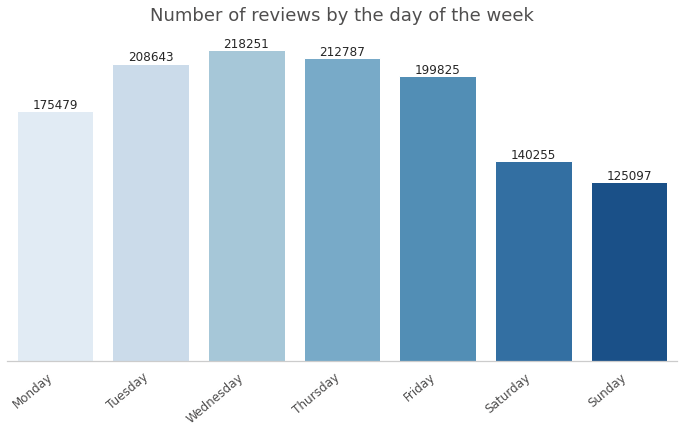

In [ ]:
bar_plot(x='day_of_week', y='num_reviews', df=num_reviews_week, title='Number of reviews by the day of the week')

It is clear that during the weekends people write less reviews (probably listens less too). 

As it is visible in the plot below, the rating between week days also differs but by a really small fraction. We can see that Monday has a lower average rating than other days except Sunday.   

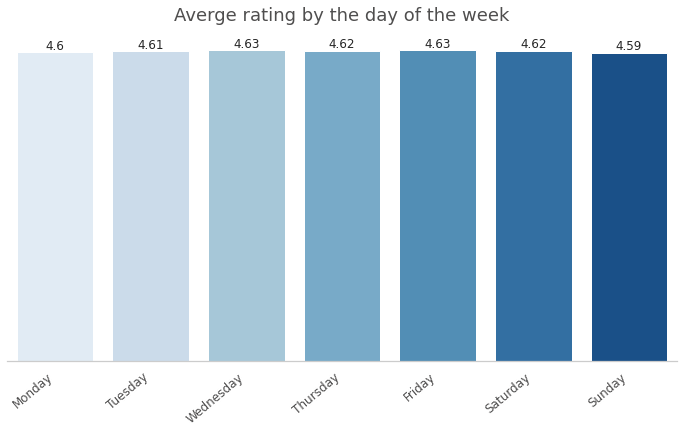

In [ ]:
bar_plot(x='day_of_week', y='avg_rating', df=num_reviews_week, title='Averge rating by the day of the week')

Having in mind a stereotype (or a fact?) that Monday is the most hated day, I want to test the hypothesis that average rating on Mondays is lower than the average rating on other days.  
  
Significance level: 5%
   
My hypothesis is the following:    
  
**HO: avg(rating) on Monday = avg(rating) other week days  
H1: avg(rating) on Monday < avg(rating) other week days**
  
To test this hypothesis I will use two sample t-test for the difference between means. The query below gives me ratings and day. 'Monday' if it's Monday, 'Other day' if it is not Monday. 

In [ ]:
query = """
        select rating, 
        case cast (strftime('%w', created_at) as integer)
                  when 1 then 'Monday'
                  else 'Other day' end as Day
        from reviews                """

ratings = pd.read_sql(query, con)
ratings

,rating,Day
0,5,Other day
1,5,Other day
2,1,Other day
3,5,Other day
4,5,Other day
...,...,...
1280332,2,Other day
1280333,4,Other day
1280334,1,Other day
1280335,5,Other day


In [ ]:
ratings.groupby('Day').describe()

rating                                             
               count      mean       std  min  25%  50%  75%  max
Day                                                              
Monday      175479.0  4.599650  1.075383  1.0  5.0  5.0  5.0  5.0
Other day  1104858.0  4.618104  1.053756  1.0  5.0  5.0  5.0  5.0

We can see that average rating differs by around 0.018.    
Before running a hypothesis test, we also need to check whether variances are equal. For this purpose `scipy.stats` have a method `levene`. It runs a hypothesis test testing if the variances are equal. I therefore filter my samples and run the test.

In [ ]:
monday = ratings.query('Day == "Monday"')['rating']
other = ratings.query('Day == "Other day"')['rating']


In [ ]:
stat, p_value = levene(monday, other)
print(round(p_value,4))

0.0


We can see that p_value is basically zero, this means that variances of the groups are not equal and we need to account for that when running a hypothesis test. 

In [ ]:
stat, p_value = stats.ttest_ind(monday, other, equal_var=False, alternative = 'less')

print(f"t-statistic: {round(stat, 4)}")
print(f"p-value: {round(p_value,4)}")
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

t-statistic: -9.9786
p-value: 0.0
Reject the null hypothesis


We can see that p-value is zero. We can reject the null hypothesis at 5% significance level and conclude that average ratings on Monday are lower than on other days.

NOTE: If we were to test a hypothesis of average rating of Sunday vs average of all other days, we would also get the same results (reject the null).

If we would like to test a hypothesis for the equal/unequal means, we could use a hypothesis test with `alternative='two-sided'` or construct a confidence interval. If 95% confidence interval does not include 0, then we can conclude that averages are not equal. Below, the confidence interval is calclulated for the same samples. We can see that it does not include 0 and we can also conclude that samples have different means. 

In [ ]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(monday), sms.DescrStatsW(other))
cm.tconfint_diff(usevar='unequal')

(-0.02385535326818672, -0.013052175430259438)

#### Day cycle

Having glimsed at the the week cycle, lets see how the average number of reviews differs during the day cycle.   
The query below calculates counts of reviews written each hour over the whole period. The calculates average of these counts for working days, and weekend days separately. The resukts are plotted below.

In [ ]:
query = """
        select avg(num_reviews) average_reviews, hour, 'work day' as type_of_day
        from(
        select count(*) num_reviews, strftime('%H', created_at) as hour,
        case cast (strftime('%w', created_at) as integer)
                  when 0 then 'Sunday'
                  when 1 then 'Monday'
                  when 2 then 'Tuesday'
                  when 3 then 'Wednesday'
                  when 4 then 'Thursday'
                  when 5 then 'Friday'
                  else 'Saturday' end as week_day
        from reviews r
        where week_day != 'None' & hour != 'None'
        group by week_day, hour
        )
        where week_day != 'Saturday' or week_day != 'Sunday'
        group by hour

        union all

        select avg(num_reviews) average_reviews, hour, 'weekend' as type_of_day
        from(
        select count(*) num_reviews, strftime('%H', created_at) as hour,
        case cast (strftime('%w', created_at) as integer)
                  when 0 then 'Sunday'
                  when 1 then 'Monday'
                  when 2 then 'Tuesday'
                  when 3 then 'Wednesday'
                  when 4 then 'Thursday'
                  when 5 then 'Friday'
                  else 'Saturday' end as week_day
        from reviews r
        where week_day != 'None' & hour != 'None'
        group by week_day, hour
        )
        where week_day == 'Saturday' or week_day == 'Sunday'
        group by hour

        """
num_reviews = pd.read_sql(query, con)
num_reviews

,average_reviews,hour,type_of_day
0,9311.142857,00,work day
1,9784.714286,01,work day
2,9425.428571,02,work day
3,8207.428571,03,work day
4,6492.428571,04,work day
5,4686.714286,05,work day
6,3211.285714,06,work day
7,2189.714286,07,work day
8,1655.000000,08,work day
9,1697.428571,09,work day


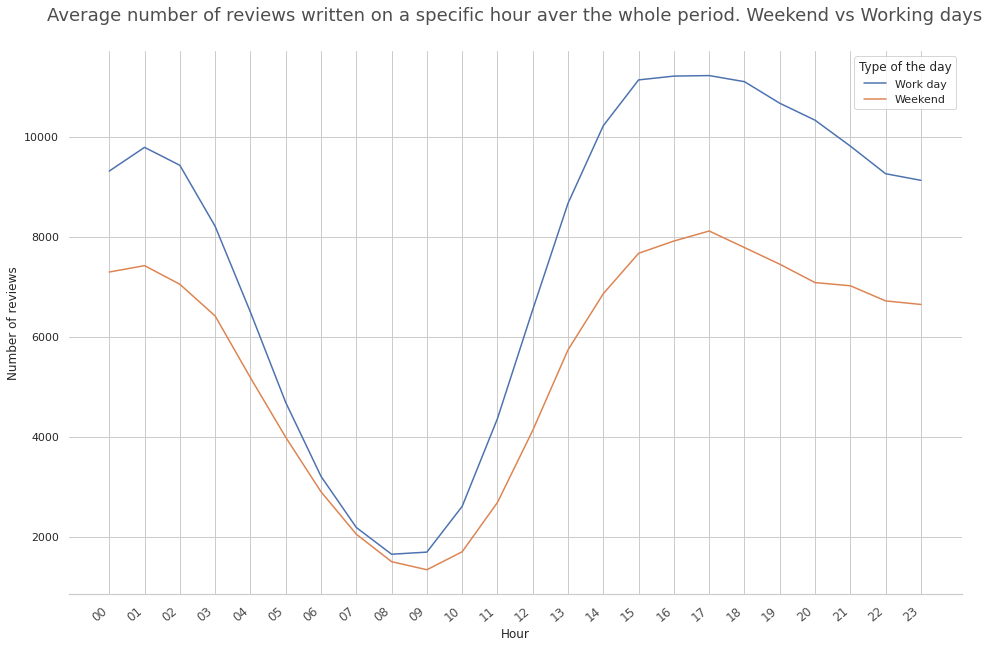

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(x="hour", y="average_reviews", hue="type_of_day", data=num_reviews)
sns.set(style="whitegrid")
plt.title('Average number of reviews written on a specific hour aver the whole period. Weekend vs Working days', size=18, 
          color='#4f4e4e', pad=30)
plt.xlabel('Hour')
plt.ylabel('Number of reviews')
plt.xticks(size=12, color='#4f4e4e', rotation=40, ha='right')
legend = plt.legend(['Work day','Weekend'], title = "Type of the day")
sns.despine(left=True)


It is visible that spread between work days and weekend exist, however it dimishes early in the morning, indicating that either less than usual reviews are written in the morning during working days, or more than usual reviews in the morning during weekends, because otherwise the spread would be the same over the whole day.  
We can aslo see that poeple write reviews most actively between 14:00 and 21:00.  Least actively- between 06:00 and 11:00   

I am now also interested into the differences between week days and day cycle regarding average rating. Below I plot average rating each hour for each day of the week.

In [3]:
query = """

        select avg(rating) avg_rating, strftime('%H', created_at) as hour,
        case cast (strftime('%w', created_at) as integer)
                  when 0 then 'Sunday'
                  when 1 then 'Monday'
                  when 2 then 'Tuesday'
                  when 3 then 'Wednesday'
                  when 4 then 'Thursday'
                  when 5 then 'Friday'
                  else 'Saturday' end as week_day
        from reviews r
        where week_day != 'None' & hour != 'None'
        group by week_day, hour
        order by 
            case
                when week_day = 'Monday' then 1
                when week_day = 'Tuesday' then 2
                when week_day = 'Wednesday' then 3
                when week_day = 'Thursday' then 4
                when week_day = 'Friday' then 5
                when week_day = 'Saturday' then 6
                when week_day = 'Sunday' then 7
            end asc


        """
num_reviews = pd.read_sql(query, con)
num_reviews

,avg_rating,hour,week_day
0,4.671712,00,Monday
1,4.644991,01,Monday
2,4.642903,02,Monday
3,4.597491,03,Monday
4,4.558314,04,Monday
...,...,...,...
163,4.618485,19,Sunday
164,4.602274,20,Sunday
165,4.600197,21,Sunday
166,4.618402,22,Sunday


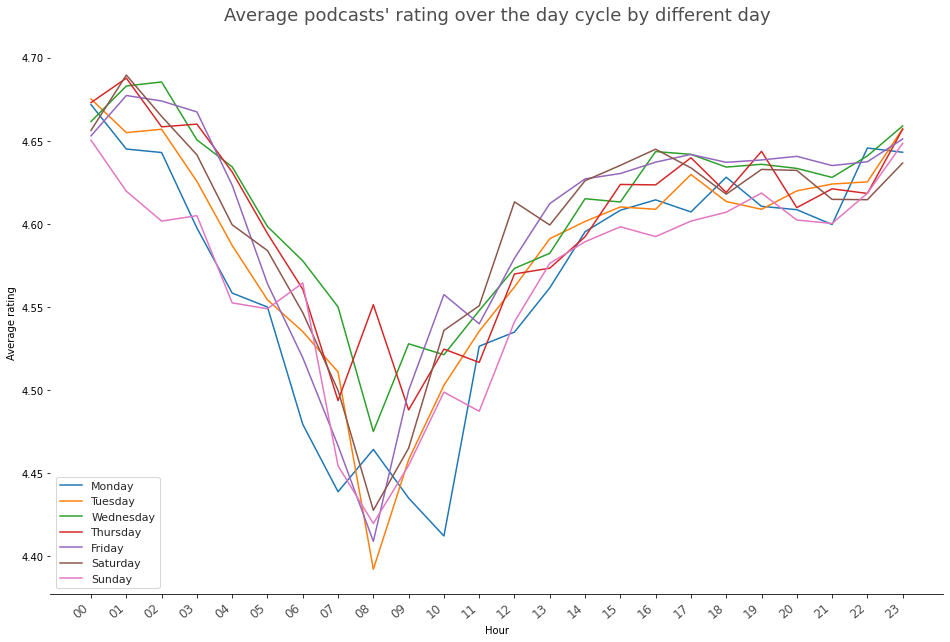

In [4]:
plt.figure(figsize=(16, 10))
sns.lineplot(x="hour", y="avg_rating", hue="week_day", data=num_reviews)
sns.set(style="whitegrid")
plt.title("Average podcasts' rating over the day cycle by different day", size=18, 
          color='#4f4e4e', pad=30)
plt.xlabel('Hour')
plt.ylabel('Average rating')
plt.xticks(size=12, color='#4f4e4e', rotation=40, ha='right')
legend = plt.legend(title = "")
sns.despine(left=True)

Even though it seems there is no huge difference between any days and it seems like the trend of average rating is similiar to the one as in plot above, this plot gives one interesting insight.    
As the number of reviews written decrease during the morning hours, same does the average rating, which is quite strange. If the data is correct, then it can be said that no matter what day of the week it is, the reviews written in the early moring on average will be rated lower than if they would be written during the day hours. This might imply tht people are angrier in the morinng and it can be even seen in the ratings of the podcasts.

I think this idea and results are worth testing out, therefore I will run the hypothesis test.  
My null hyothesis is that average rating of morning reviews is equal to average rating of reviews written on any other time, whereas alternative is that morning average is lower.    
In short:  
**H0: avg(rating) at 05:00-11:00 = avg(rating) 12:00-04:00  
H1: avg(rating) at 05:00-11:00 < avg(rating) 12:00-04:00**  
To test this hypothesis I will uses two sample t-test for the difference between means.  My significance level is 5%.  
The query below returns the rating and time denoted as 'Morning', if its 05:00 - 11:00, and 'Not morning' if its 12:00 - 04:00. 

In [ ]:
query = """
        select rating, 
          (case when time = '05' then 'Morning'
                when time = '06' then 'Morning'
                when time = '07' then 'Morning'
                when time = '08' then 'Morning'
                when time = '09' then 'Morning'
                when time = '10' then 'Morning'
                when time = '11' then 'Morning'
                else 'Not morning' end) as time_2 
        from(
        select rating, strftime('%H', created_at) as time
        from reviews 
        where time != 'None'
        )

        """
morning_and_not = pd.read_sql(query, con)
morning_and_not

,rating,time_2
0,5,Not morning
1,5,Not morning
2,1,Not morning
3,5,Not morning
4,5,Not morning
...,...,...
1280330,2,Not morning
1280331,4,Not morning
1280332,1,Not morning
1280333,5,Not morning


In [ ]:
morning_and_not.groupby('time_2').describe()

rating                                             
                 count      mean       std  min  25%  50%  75%  max
time_2                                                             
Morning       142916.0  4.524189  1.169177  1.0  5.0  5.0  5.0  5.0
Not morning  1137419.0  4.627057  1.041217  1.0  5.0  5.0  5.0  5.0

We can already see that the average difference between the groups is 0.1. Considering a huge sample size, this result will probably be in favour of my null hypothesis.  

Before running a hypothesis test, we also need to check whether variances are equal. For this purpose `scipy.stats` have a method `levene`. It runs a hypothesis test testing if the variances are equal. I therefore filter my samples and run the test.

In [ ]:
morning = morning_and_not.query('time_2 == "Morning"')['rating']
other = morning_and_not.query('time_2 == "Not morning"')['rating']

In [ ]:
levene(morning, other)

LeveneResult(statistic=1204.1607123126435, pvalue=1.0096024693883753e-263)

p-value is clearly zero, therefore variances are not equal. I will run the hypothesis test mentioning that `equal_var=False`.

In [ ]:
stat, p_value = stats.ttest_ind(morning, other, equal_var=False, alternative='less')

print(f"t-statistic: {round(stat, 4)}")
print(f"p-value: {round(p_value,4)}")
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

t-statistic: -31.7184
p-value: 0.0
Reject the null hypothesis


We can see that the t-statistic is really huge while p-value is zero. Not only we can reject the null hypothesis at 5% significance level but also at 1%.  
Average ratings of the podcasts in the morning are lower than compared to other day time. 

### Digging a bit deeper

#### Content lenght and rating relationship

I have an idea that the longer comment/review is, the more negative content it has.   
To test it, I write a query to see the length of each review and then calculate the correlation coefficient between rating and length.

In [ ]:
query = """
        select p.title, r.content, r.rating, length(r.content) content_length
        from podcasts p
        join reviews r
        using(podcast_id)
        """

len = pd.read_sql(query, con)
len

,title,content,rating,content_length
0,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,100
1,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,178
2,TED Talks Daily,"I'm a liberal myself, but its pretty obvious a...",1,233
3,TED Talks Daily,I find Tedx talks very inspirational but I oft...,5,158
4,TED Talks Daily,"I love this podcast, it is so good.",5,35
...,...,...,...,...
984400,Mile Higher Podcast,Interesting concepts and topics but the amount...,2,510
984401,Something Was Wrong,"Not a huge fan of the theme song, but that’s k...",4,388
984402,Something Was Wrong,I feel like if you cut one episode and made ev...,1,460
984403,Something Was Wrong,I was actually bummed thinking it would take a...,5,140


In [ ]:
print(f'Correlation between rating and content length is {round(np.corrcoef(len.rating, len.content_length)[0][1], 2)}')

Correlation between rating and content length is -0.1


We can see that correlation between those two variables is around -0.1 which implies that there exist little or no association between variables. The fact that correlation is negative favours my assumption that some negative relation exists, but correlation is way too small to assume real relation.

To better see the distribution of content length, I plot a box plot below.

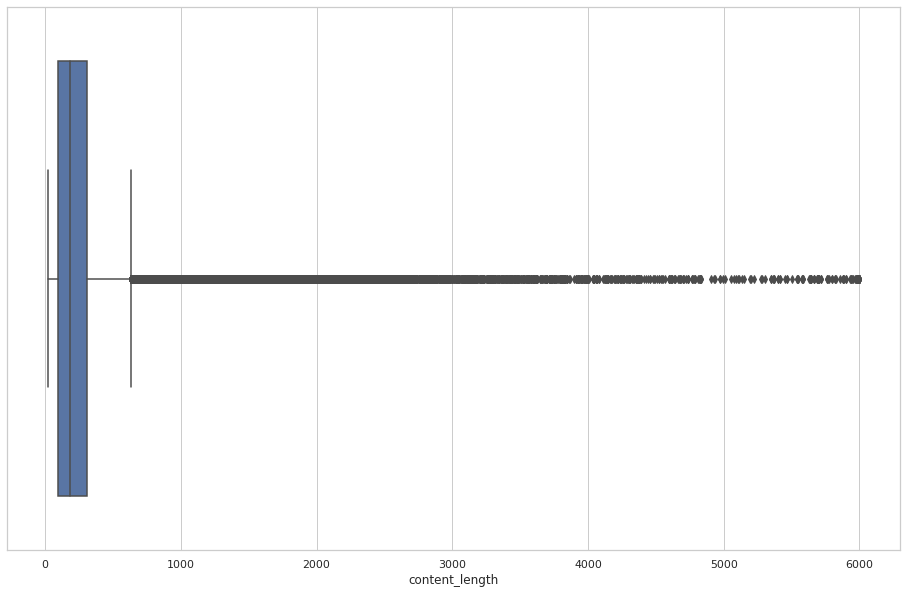

In [ ]:
plt.figure(figsize=(16, 10))

sns.boxplot(x=len["content_length"]);

From here we can see that there are many outliers represented as black points. I will remove them and check the correlaton again, maybe the results would be more significant.

Outliers represented in the box plot fall further from Q3 + 1.5*IQR, therefore I found that limit value and filter data to only have reviews where the length of the review is lower than it.

In [ ]:
iqr = len.content_length.quantile(0.75) - len.content_length.quantile(0.25)
upper = len.content_length.quantile(0.75) + 1.5*iqr
print(f'Upper end of the box plot: {upper}')

Upper end of the box plot: 634.5


In [ ]:
no_outliers = len[len['content_length'] < 635]
no_outliers

,title,content,rating,content_length
0,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,100
1,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,178
2,TED Talks Daily,"I'm a liberal myself, but its pretty obvious a...",1,233
3,TED Talks Daily,I find Tedx talks very inspirational but I oft...,5,158
4,TED Talks Daily,"I love this podcast, it is so good.",5,35
...,...,...,...,...
984400,Mile Higher Podcast,Interesting concepts and topics but the amount...,2,510
984401,Something Was Wrong,"Not a huge fan of the theme song, but that’s k...",4,388
984402,Something Was Wrong,I feel like if you cut one episode and made ev...,1,460
984403,Something Was Wrong,I was actually bummed thinking it would take a...,5,140


In [ ]:
print(f'Correlation between content length and rating (no outliers) is {round(np.corrcoef(no_outliers.content_length, no_outliers.rating)[0][1], 2)}')

Correlation between content length and rating (no outliers) is -0.06


We can see that removing outliers from the data made correlation coefficient even less negative and it did not helped to prove my hypothesis.

Another way to test my assumption would be to to check the correlation between the average rating of the podcast and the average lenght of reviews of that podcast. 
The query below also filters the podcasts so they have at least 100 of reviews because there are many podcasts with only a few reviews but with a lenght of almost maximum allowed, so it distorts the results.

In [ ]:
query = """select title, count(*) count, avg(content_length) avg_content_len, avg(rating) avg_rating
            from(
                select p.title, r.title, r.content, r.rating, length(r.content) content_length
                from podcasts p
                join reviews r
                using(podcast_id)
                )
              group by title
              having count > 100
              order by avg_content_len desc
              limit 10
        """
avg_len_rat = pd.read_sql(query, con)
avg_len_rat

,title,count,avg_content_len,avg_rating
0,The Positive Head Podcast,636,706.990566,4.874214
1,The Storm: A Lost Rewatch Podcast,726,657.252066,4.728650
2,The VBAC Link,145,560.689655,4.972414
3,Podcast Fandom,205,524.839024,4.858537
4,Pregnancy & Birth Made Easy,143,519.384615,4.965035
5,Ketovangelist Kitchen,150,518.120000,4.660000
6,PhotoBizX The Ultimate Portrait and Wedding Ph...,129,517.356589,4.961240
7,ChooseFI,969,514.286894,4.751290
8,The TryPod,1880,514.254255,4.894149
9,French Kiss Life,294,510.911565,4.952381


In [ ]:
print(f'Correlation between avg. content length and avg. rating is {round(np.corrcoef(avg_len_rat.avg_content_len, avg_len_rat.avg_rating)[0][1], 2)}')

Correlation between avg. content length and avg. rating is -0.17


We can see that correlation between average length and average rating is now around -0.17, which is a greater result in favour of my hypothesis but as a correlation coefficient it still shows a really weak relation.

#### Crazy reviewers

Having looked at the lengths of the reviews, we can also find the users who wrote the highest number of reviews.

In [ ]:
query = """
        select author_id, count(*)
        from reviews
        group by 1
        order by 2 desc
        limit 5
        """
reviews_by_author = pd.read_sql(query, con)
reviews_by_author

,author_id,count(*)
0,791F376ACA3C08D,615
1,D3307ADEFFA285C,471
2,96A3F0358E7808D,429
3,7F9EA8B1A449BFC,350
4,A52EBC918BC19D1,288


There is a person who wrote 615 reviews... I want to see the content he/she is commenting, as well which podcasts received the most attention from him/her.

In [ ]:
query = """
    select podcast, count(*) num_reviews
    from(
        select r.author_id, r.title, r.content, r.rating, p.title podcast
        from reviews r
        join podcasts p
        using(podcast_id)
        where author_id = '791F376ACA3C08D'	
        )
    group by podcast
    order by num_reviews desc
        """
pd.read_sql(query, con)

,podcast,num_reviews
0,The Joe Rogan Experience,66
1,Armchair Expert with Dax Shepard,57
2,WTF with Marc Maron Podcast,43
3,The Church of What's Happening Now: With Joey ...,39
4,This Past Weekend w/ Theo Von,35
...,...,...
61,The Jim Jefferies Show Podcast,1
62,The Koy Pond with Jo Koy,1
63,The Margaret Cho,1
64,The Wolf's Den,1


There exist 66 podcasts this person have reviewed, The Joe Rogan Experience being the most reviewed with 66 reviews written..


Below all those 66 reviews of Rogan's podcast are displayed.

In [ ]:
query = """
        select r.author_id, r.title, r.content, r.rating, r.created_at, p.title podcast
        from reviews r
        join podcasts p
        using(podcast_id)
        where author_id = '791F376ACA3C08D'	and podcast = 'The Joe Rogan Experience'
        order by r.created_at
        """
rogan_reviews_most_fan = pd.read_sql(query, con)
rogan_reviews_most_fan

,author_id,title,content,rating,created_at,podcast
0,791F376ACA3C08D,Man...,I’m off the GRAM and now I cram grams.\n\n ...,5,2019-08-26T21:23:18-07:00,The Joe Rogan Experience
1,791F376ACA3C08D,CONFIDENCE,Is vey sexy...don’t ya think? PALANCE. You sme...,5,2019-09-26T08:36:36-07:00,The Joe Rogan Experience
2,791F376ACA3C08D,"Dear Joe,",I have a serious issue. I did some “rolling” l...,5,2019-10-12T09:38:27-07:00,The Joe Rogan Experience
3,791F376ACA3C08D,"Dear Joe,",You were much more handsome on NEWSRADIO. I do...,5,2019-10-19T16:14:58-07:00,The Joe Rogan Experience
4,791F376ACA3C08D,"Dear Joe,",Happy Halloween. You ought to pass out supplem...,5,2019-10-26T15:34:47-07:00,The Joe Rogan Experience
...,...,...,...,...,...,...
61,791F376ACA3C08D,"Dear Joe,",Your steadfast dedication to working out makes...,1,2020-09-13T20:36:40-07:00,The Joe Rogan Experience
62,791F376ACA3C08D,"Dear Joe,",To think some look at you as some modern day L...,1,2020-09-24T18:57:56-07:00,The Joe Rogan Experience
63,791F376ACA3C08D,"Dear Joe,","Your bloody, dry, and chapped lips are grossin...",1,2020-10-03T18:59:43-07:00,The Joe Rogan Experience
64,791F376ACA3C08D,"Dear Joe,",You and Maynard are complete TOOLS. 🕯\n\n ...,1,2020-10-23T16:41:32-07:00,The Joe Rogan Experience


In [ ]:
rogan_reviews_most_fan.rating.value_counts()

1    41
5    25
Name: rating, dtype: int64

By manually inspecting the content of those reviews, it is clear that they have nothing to do with a constructive opinion. Most of them are insults, some are nonsense or personal experience/stories. The rating is either 1 or 5 and it has nothing to do with the content itself. It is unbelievable all of these are written by the same person..   
Also, it can be seen that there are some identical reviews with a bit different timestamp, which implies that the reviews in this data set insludes edits as a diferent review. This is another anaomaly of this data set meaning there exist almost identical reviews of the same user even though in reality only one review is displayed in Apple Podcasts.


---



Even more interesting case is the reviews of the second 'Most Active Reviews Writer". This time the podcasts reviewd are all distinct, but the content is just embarassing. 

In [ ]:
query = """
        select r.author_id, r.title, r.content, r.rating, r.created_at, p.title podcast
        from reviews r
        join podcasts p
        using(podcast_id)
        where author_id = 'D3307ADEFFA285C'
        order by r.created_at
        """

reviews_of_second = pd.read_sql(query, con)
reviews_of_second

,author_id,title,content,rating,created_at,podcast
0,D3307ADEFFA285C,Awesome Podcast!!!,"Mike, host of the Wolf & Iron podcast, highlig...",5,2019-12-02T17:45:39-07:00,"Wolf & Iron | Virtues, Skills, Manliness!"
1,D3307ADEFFA285C,Awesome Podcast!!!,"Martin, host of the Outperform podcast, highli...",5,2019-12-02T17:58:11-07:00,Outperform
2,D3307ADEFFA285C,Awesome Podcast!!!,"Paula, host of the Jump Start Your Joy podcast...",5,2019-12-02T18:08:49-07:00,Jump Start Your Joy
3,D3307ADEFFA285C,Awesome Podcast!!!,"Stephan, host of the Get Yourself Optimized po...",5,2019-12-02T18:21:01-07:00,Get Yourself Optimized
4,D3307ADEFFA285C,Awesome Podcast!!!,"Erin, host of the Game Changers podcast, highl...",5,2019-12-02T19:42:02-07:00,Game Changers | Personal Branding advice from ...
...,...,...,...,...,...,...
391,D3307ADEFFA285C,Awesome Podcast!!!,"Jeff, host of the Morning Fire for Entrepreneu...",5,2021-07-07T02:17:21-07:00,Morning Fire!
392,D3307ADEFFA285C,Awesome Podcast!!!,"Jamie, host of the Million Dollar PIVOT podcas...",5,2021-07-07T02:21:16-07:00,Million Dollar PIVOT
393,D3307ADEFFA285C,Awesome Podcast!!!,"Rock, host of the Rock Your Money, Rock Your L...",5,2021-07-07T02:30:24-07:00,IAmMovement Podcast
394,D3307ADEFFA285C,Awesome Podcast!!,"Damian, host of the You Are The Superhero pod...",5,2021-09-14T06:28:19-07:00,Inner Secrets of Success podcast


The content of all the reviews written for 395 podcasts above follows the following formula:

Content:  
"`Name of the Host` +  host of the + `Name of the Podcast` + podcast, highlights all aspects of + `Some Categories of the Podcast` + and more in this can’t miss podcast! The host and expert guests offer insightful advice and information that is helpful to anyone that listens!"

This recipe can even be seen in the wordcloud below. Small words represents categories which are different for some podcasts, and all the bigger words are just a template.

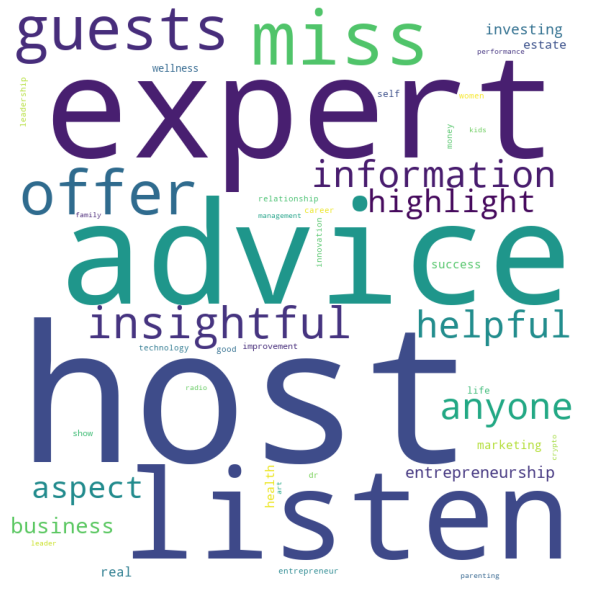

In [ ]:
prepare_and_plot_wordcloud(reviews_of_second.content)

## Summary

### Insights/Conslusions
- The data set provided is suspiciuos considering different ratings and the number of reviews in the Apple Podcasts page and here.  
- It is hard to understand the real rating of the podcast because there exist poeple writing daily reviews about something unrelated to the podast. 
- Some reviews are written using software - they are all the same, with the rating of 5.   
- Data set assumes edited review as a different one. This affects the number of reviews and rating. 
- Poeple write reviews most actively between 14:00 and 21:00. Least actively- between 06:00 and 11:00.
- Reviews written 05:00-11:00 have statistically significant lower average rating than compared to period 12:00-04:00.
- Reviews written on Mondays have statistically lower average rating than compared to average rating of all other days combined.
- There exist a weak negative correlation betweeen the average length of the reviews of the podcast and the average rating of the podcast.
- 2019 was the year of podcast - the number of reviews written reached all time high after starting to grow rapidly in 2016. 
- After 2019 number of reviews started to decline rapidly and reached lows in the end of 2021 which looks suspicious.
- Average rating of podcasts started to decrease in 2016.   
   



#### Possible improvements

To better understand how the podcasting is changing (growing, loosing popularity, etc.) more data features are needed. What I lacked the most was the number of podcasts reviews and the date when the podcast was released (1st episode).  
It is also unclear whether all the reviews are still collected and uploaded to this data set because some results looks strange. It would be nice to have correct data in order to be sure about the results obtained.  